#                           ***OBJECTIVE***
### The classification goal is to predict the likelihood of a liability customer buying personal loans.
   
      

    Description :
The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

##1. Import libraries and check datatypes

 Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


To upload the file

In [2]:
from google.colab import files
done = files.upload()

Saving Bank_Personal_Loan_Modelling a.csv to Bank_Personal_Loan_Modelling a.csv


   Importing File
 and
 viewing 5 colums of the file

In [3]:
import io
datas = pd.read_csv(io.BytesIO(done['Bank_Personal_Loan_Modelling a.csv']))
datas.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Viewing last 5 rows

In [4]:
 datas.tail(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


There are 14 factors on which our projects work. These are :-


*   ID: Customer ID
*   Age: Customer's age in completed years


*   Experience: #years of professional experience
*  Income: Annual income of the customer ($000)

*  ZIP Code: Home Address ZIP code.

* Family: Family size of the customer

*  CCAvg: Avg. spending on credit cards per month ($000)

*    Education: Education Level. 1: Undergrad; 2: Graduate; 3:
Advanced/Professional



* Mortgage: Value of house mortgage if any.  


* Personal Loan: Did this customer accept the personal loan offered in the last campaign? 


* Securities Account: Does the customer have a securities account with the bank?   


* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?  

* Online: Does the customer use internet banking facilities?   
*    Credit card: Does the customer use a credit card issued by the bank?



Display the sumarry of the file, datatypes of columns and non-null values of rows.

In [5]:
datas.shape

(5000, 14)

In [6]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Displays the summary stats i.e. count,mean,standard deviation,minimum,maximum,quartiles,etc.

In [7]:
datas.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Displays all the null-values

In [8]:
 datas.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## 2. Data Cleaning

As we are using the Logistic approach in this project so in order to make our data more precise we need to remove noice from our data.  

In [9]:
exp = datas["Experience"]
age=datas['Age']
corrlation=exp.corr(age)
corrlation


0.9942148569683321

As we see that there is a correlation between the two. So, we need to remove the experience column and also ID column too don't provide any necessary information.   

In [10]:
datas=datas.drop(['ID','Experience'],axis=1)
datas.head(3)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0


## 3. EDA: To Study the data distribution

To display the unique values in each column

In [11]:
 datas.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

As we  see that the Zip Code column has too many unique entries. Therefore, it is a nominal variable.

Family column don't provide any information that is necessary for our model. So, it don't affect the model.

We drop both the columns.

In [12]:
datas.drop(['ZIP Code','Family'],axis=1)

,Age,Income,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,1.6,1,0,0,1,0,0,0
1,45,34,1.5,1,0,0,1,0,0,0
2,39,11,1.0,1,0,0,0,0,0,0
3,35,100,2.7,2,0,0,0,0,0,0
4,35,45,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1.9,3,0,0,0,0,1,0
4996,30,15,0.4,1,85,0,0,0,1,0
4997,63,24,0.3,3,0,0,0,0,0,0
4998,65,49,0.5,2,0,0,0,0,1,0


Ther are 3462 people with zero Mortgage

In [13]:
(datas.Mortgage==0).sum()

3462

Ther are 106 people with zero credit card spending per month

In [14]:
(datas.CCAvg==0).sum()

106

Determinig value counts of all catagorical columns

In [15]:
datas['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [16]:
datas['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [17]:
datas['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [18]:
datas['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [19]:
datas['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

**Univariate Analysis**


**Age has symmetric distribution**

 It is normally distributed . Most of the people lie between 30 to 60 years. Also the mean and median is equal to 45 which also confirm the range lies between 30 to 60.

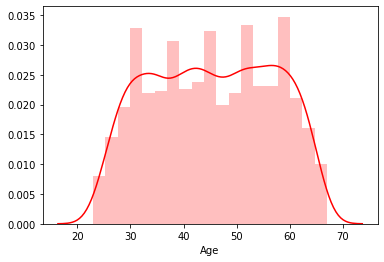

In [20]:
sns.distplot(datas.Age,kde=True,color='red',hist_kws={"linewidth": 20,'alpha':0.25});

 **Income has left skewed distribution**

  It is positively skewed(Mean>Median).The range of salries mainly range from 45- 80k. 

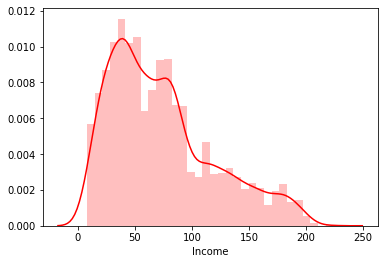

In [21]:
sns.distplot(datas.Income,kde=True,color='red',hist_kws={"linewidth": 20,'alpha':0.25});

**CCAvg has left skewed distribution**

It is positively skewed(Mean>Median). The range of values (average spending ) lie between 0 to 1. Very less people spend amount greater than 2.5.

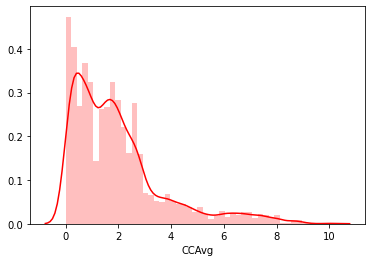

In [22]:
sns.distplot(datas.CCAvg,kde=True,color='red',hist_kws={"linewidth": 20,'alpha':0.25});

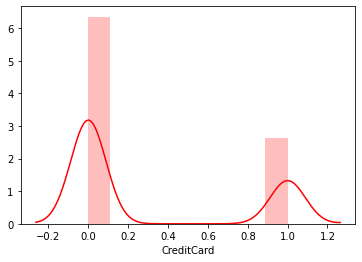

In [23]:
sns.distplot(datas.CreditCard,kde=True,color='red',hist_kws={"linewidth": 20,'alpha':0.25});

**Mortgage has highly skewed distribution** 

 70 % of people have no mortgage. The maximum value is 635K.

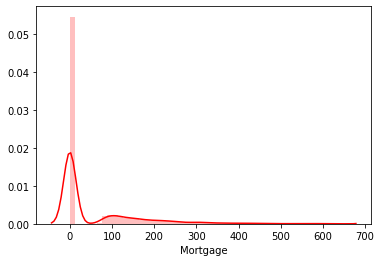

In [24]:
sns.distplot(datas.Mortgage,kde=True,color='red',hist_kws={"linewidth": 20,'alpha':0.25});

Education is evenly distributed with slight more people undergraduate.

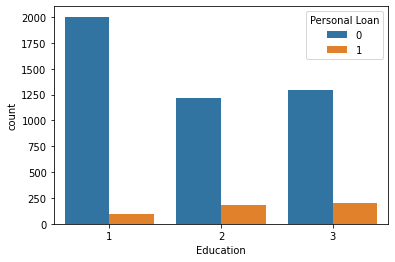

In [25]:
sns.countplot(x='Education',hue='Personal Loan',data=datas)

## **Multivariate Analysis**

Influence of income and education on personal loan:

People who have more income seems to grant personal loan.

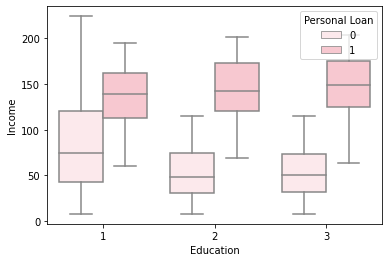

In [26]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=datas,color='pink');

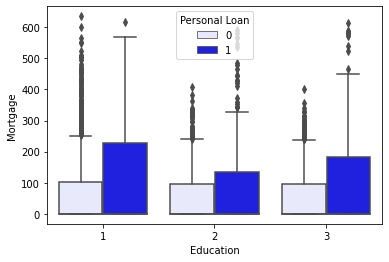

In [27]:
sns.boxplot(x='Education', y='Mortgage', hue='Personal Loan', data=datas,color='blue');

*Inference* : From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage



 Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

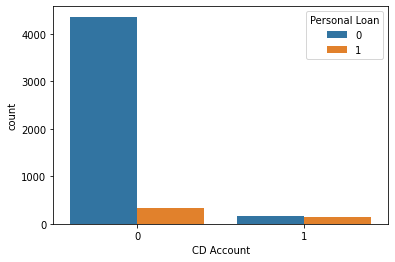

In [28]:
sns.countplot(x='CD Account',data=datas,hue='Personal Loan')

Majority of customers who does not have loan have securities account.

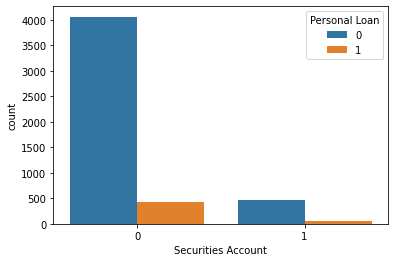

In [29]:
sns.countplot(x='Securities Account',hue='Personal Loan',data=datas)

## **Comparision using Heatmap**

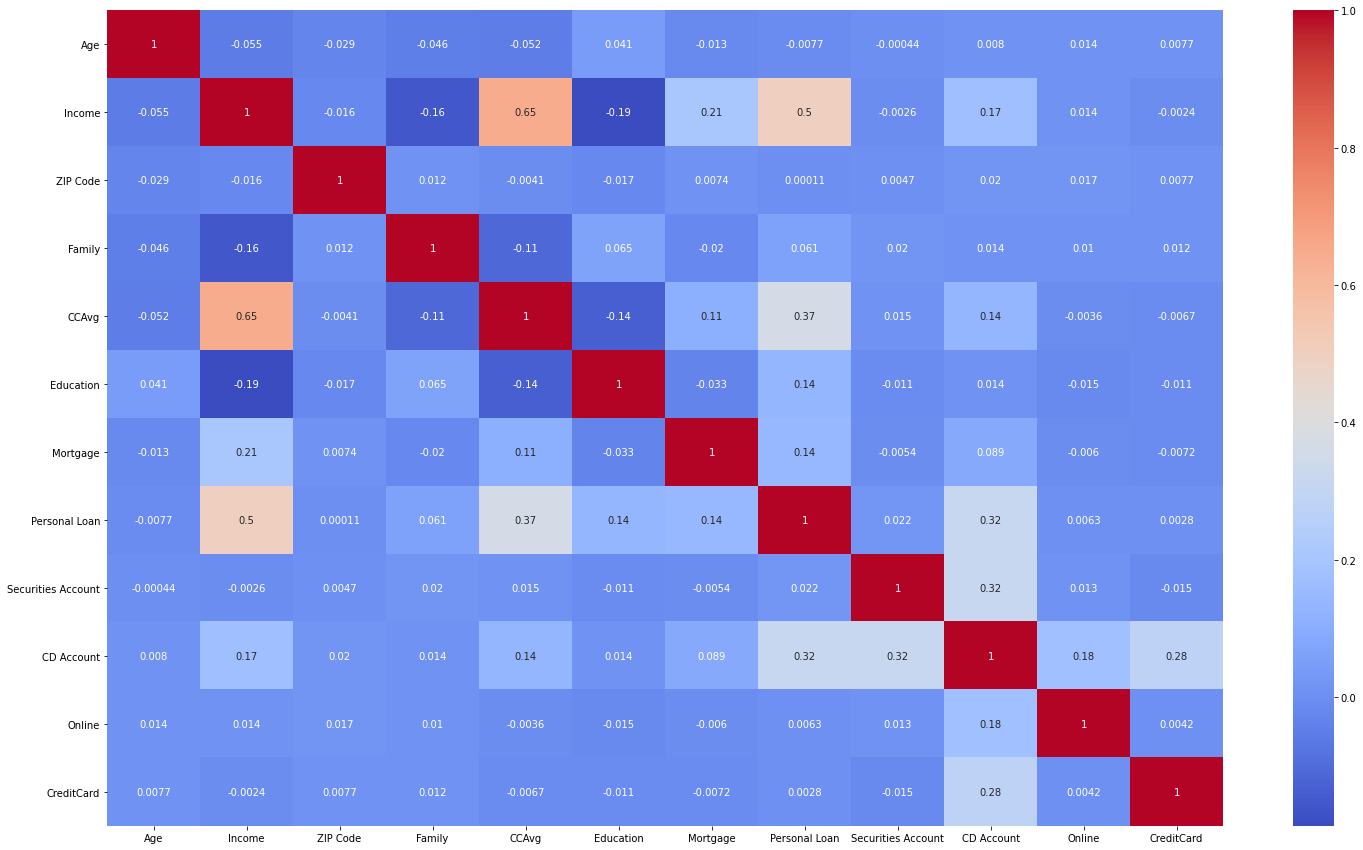

In [30]:
fig,ax = plt.subplots(figsize=(25,15))
sns.heatmap(datas.corr(),cmap='coolwarm',annot=True);

In [31]:
data_X=datas.loc[:,datas.columns != "Personal Loan"]
data_Y=datas[["Personal Loan"]]

# 4.Transformation of Feature Variables

As Income column is skewed so, we apply Yeo-johnson transformation in order to make data evenly distributed to make our analysis more precise.

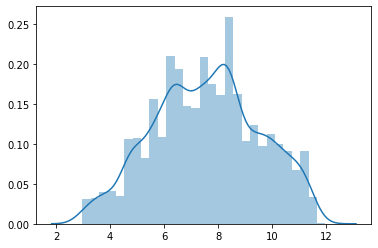

In [32]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(data_X["Income"].values.reshape(-1,1))
temp = pt.transform(data_X["Income"].values.reshape(-1,1))
sns.distplot(temp);

Same is the case for Credit Card Average so, we apply yeo-johnson tranformation to it. 

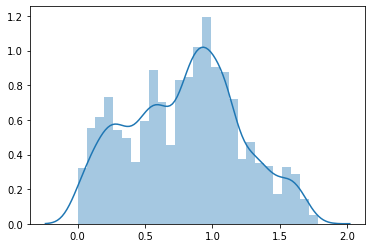

In [33]:
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(data_X["CCAvg"].values.reshape(-1,1))
temp = pt.transform(data_X["CCAvg"].values.reshape(-1,1))
sns.distplot(temp);

THe Mortgage column is highly skewed and in ordrer to make our data linear and pricise we use binning.

In [34]:
data_X["Mortgage_Int"] = pd.cut(data_X["Mortgage"],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
data_X.drop("Mortgage", axis=1, inplace=True)

In [35]:
data_X.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,25,49,91107,4,1.6,1,1,0,0,0,0
1,45,34,90089,3,1.5,1,1,0,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,1,0


# **Normalising and Splitting the data**

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_X, data_Y, test_size=0.3,stratify=data_Y,random_state=0)

In [37]:
X_train.reset_index(drop=True, inplace=True);
X_test.reset_index(drop=True, inplace=True);
y_train.reset_index(drop=True, inplace=True);
y_test.reset_index(drop=True, inplace=True);

In [38]:
X_train.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,51,24,94301,3,0.4,1,0,0,1,1,0
1,64,35,90266,1,1.5,2,1,0,0,0,0
2,52,31,94923,4,1.8,1,0,0,1,1,0
3,32,20,93106,1,0.5,3,0,0,1,0,1
4,62,54,91320,1,0.8,1,1,0,0,1,0


In [39]:
from sklearn.preprocessing import StandardScaler
for ind, column in enumerate(X_train.columns):
  sc=StandardScaler()
  
  
  sc.fit(X_train[[column]])


  np = sc.transform(X_train[[column]])
  X_train.loc[:,column] = pd.Series(np.flatten())
  
  
  np = sc.transform(X_test[[column]])
  X_test.loc[:,column] = pd.Series(np.flatten())

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

# **6. Application of various models  :-**

## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
logit =LogisticRegression(random_state=0)
logit.fit(X_train,y_train)
y_pred_logit=logit.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Building the confusion matrix of the model.

In [41]:
from sklearn import metrics
cnf_matrix_logit = metrics.confusion_matrix(y_test, y_pred_logit)
cnf_matrix_logit

array([[1337,   19],
       [  54,   90]])

Display of classification report (i.e. precision,accuracy,recall,f1-score,etc) 

In [43]:
print("Accuracy score for train data:",metrics.accuracy_score(y_test, y_pred_logit))

Accuracy score for train data: 0.9513333333333334


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logit))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1356
           1       0.83      0.62      0.71       144

    accuracy                           0.95      1500
   macro avg       0.89      0.81      0.84      1500
weighted avg       0.95      0.95      0.95      1500



# Decision Tree Classifier

In [45]:
from sklearn.tree import  DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0,max_depth=8)
dtc.fit(X_train,y_train)
y_pred_dtc=dtc.predict(X_test)

Building the confusion matrix of the model.

In [46]:
from sklearn import metrics
cnf_matrix_dtc = metrics.confusion_matrix(y_test, y_pred_dtc)
cnf_matrix_dtc

array([[1344,   12],
       [  18,  126]])

In [47]:
print("Accuracy score for train data:",metrics.accuracy_score(y_test, y_pred_dtc))

Accuracy score for train data: 0.98


Display of classification report (i.e. precision,accuracy,recall,f1-score,etc) 

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.91      0.88      0.89       144

    accuracy                           0.98      1500
   macro avg       0.95      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500



# Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0,n_estimators=500,max_depth=8)
rfc.fit(X_train,y_train)
y_pred_rfc=rfc.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Building the confusion matrix of the model.

In [50]:
from sklearn import metrics
cnf_matrix_rfc = metrics.confusion_matrix(y_test, y_pred_rfc)
cnf_matrix_rfc

array([[1354,    2],
       [  16,  128]])

In [51]:
print("Accuracy score for train data:",metrics.accuracy_score(y_test, y_pred_rfc))

Accuracy score for train data: 0.988


Display of classification report (i.e. precision,accuracy,recall,f1-score,etc) 

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.89      0.93       144

    accuracy                           0.99      1500
   macro avg       0.99      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500



# NAIVE BAYES

In [53]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred_NB = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Building the confusion matrix of the model.

In [54]:
cnf_matrix_NB = metrics.confusion_matrix(y_test, y_pred_NB)
cnf_matrix_NB

array([[1243,  113],
       [  57,   87]])

The display of accuracy of the model.

In [55]:
print("Accuracy score for train data:",metrics.accuracy_score(y_test, y_pred_NB))

Accuracy score for train data: 0.8866666666666667


Display of classification report (i.e. precision,accuracy,recall,f1-score,etc) 

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1356
           1       0.43      0.60      0.51       144

    accuracy                           0.89      1500
   macro avg       0.70      0.76      0.72      1500
weighted avg       0.91      0.89      0.89      1500



# KNN Model

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_train,y_train)
y_pred_KNN=knn.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Building the confusion matrix of the model.

In [59]:
from sklearn import metrics
cnf_matrix_KNN = metrics.confusion_matrix(y_test, y_pred_KNN)
cnf_matrix_KNN

array([[1352,    4],
       [  72,   72]])

The display of accuracy of the model.

In [60]:
print("Accuracy score for train data:",metrics.accuracy_score(y_test, y_pred_KNN))

Accuracy score for train data: 0.9493333333333334


Display of classification report (i.e. precision,accuracy,recall,f1-score,etc) 

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1356
           1       0.95      0.50      0.65       144

    accuracy                           0.95      1500
   macro avg       0.95      0.75      0.81      1500
weighted avg       0.95      0.95      0.94      1500



# **Conclusion**

1. We imported the libraries that would be used to make the model and checked the properties of library blike its datatype, shape, null values.

2. We performed data cleaning in order to make our analysis more precise.
ID  and ZipCode columns were removed as they were nominal variables.
Age and Experience were found to have a very high accuracy.
3. We prformed more detailed analysis on  the data and made data more readable and accurate appling various methods.

4. We applied yeo-johnson transformation for feature variable and for Mortgage we applied binning as it was highly skewed.

5. We applied normalisation and splitting the training and testing data in the ratio of 70:30.

6. On applying different models.

# Logistic Regression

Accuracy : 0.95133

Confusion Matrix : [[1337,   19], 
                   [  54,   90]]

Classification-Report : 
precision    recall  f1-score   support

           0       0.96      0.99      0.97      1356
           1       0.83      0.62      0.71       144

    accuracy                           0.95      1500
   macro avg       0.89      0.81      0.84      1500
   
weighted avg       0.95      0.95      0.95      1500






## Decision Tree Classifier

Accuracy : 0.98

Confusion Matrix : [[1344,   12],
       [  18,  126]]

Classification-Report :  precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.91      0.88      0.89       144

    accuracy                           0.98      1500
   macro avg       0.95      0.93      0.94      1500
   
weighted avg       0.98      0.98      0.98      1500
 

# Random Forest Classifier

Accuracy : 0.988

Confusion Matrix :  [[1354,    2],
       [  16,  128]]

Classification-Report : precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.89      0.93       144

    accuracy                           0.99      1500
   macro avg       0.99      0.94      0.96      1500
   
weighted avg       0.99      0.99      0.99      1500
 

# Naive Bayes

Accuracy : 0.886

Confusion Matrix : [[1243,  113],
       [  57,   87]]

Classification-Report : precision    recall  f1-score   support

           0       0.96      0.92      0.94      1356
           1       0.43      0.60      0.51       144

    accuracy                           0.89      1500
   macro avg       0.70      0.76      0.72      1500
   
weighted avg       0.91      0.89      0.89      1500


# KNN Model

Accuracy : 0.989

Confusion Matrix : [[1352,    4],
       [  72,   72]] 

Classification-Report : precision    recall  f1-score   support

           0       0.95      1.00      0.97      1356
           1       0.95      0.50      0.65       144

    accuracy                           0.95      1500
   macro avg       0.95      0.75      0.81      1500
   
weighted avg       0.95      0.95      0.94      1500